# PANDAS

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

## Installing and Using Pandas


In [1]:
# !conda install pandas

In [1]:
import pandas
pandas.__version__

'1.2.4'

### Pandas - import modules	

In [2]:
from pandas import DataFrame , read_csv # General syntax to import a library but no functions:
import pandas as pd # this is how I  usually import pandas
import numpy as np

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [9]:
data['b']

0.5

In [10]:
# non-sequential index
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) 
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

Series as specialized dictionary


In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
population['California']

38332521

In [13]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

## The Pandas dataframe Object
The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

In [15]:
one = pd.Series([1., 2., 3.], index =['c', 'a', 'd'])
two = pd.Series([1., 2., 3., 4., 5. , 6.], index=['a', 'b', 'c', 'd', 0, 1])
d = {'one':one,'two':two}
df = pd.DataFrame(d)
df

,one,two
a,2.0,1.0
b,NaN,2.0
c,1.0,3.0
d,3.0,4.0
0,NaN,5.0
1,NaN,6.0


In [16]:
one = pd.Series([1., 2., 3.], index =[0,1,2])
two = pd.Series([1., 2., 3., 4., 5. , 6.], index=['a', 'b', 'c', 'd', 'e', 'f'])
d = {'one':one,'two':two}
df = pd.DataFrame(d)
df

,one,two
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
a,NaN,1.0
b,NaN,2.0
c,NaN,3.0
d,NaN,4.0
e,NaN,5.0
f,NaN,6.0


In [17]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968 , 155 , 77 , 578 , 973]
# To merge these two lists together we will  use the zip function .
BabyDataSet = list( zip( names , births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

Create a data frame

In [18]:
df = pd.DataFrame( data = BabyDataSet ,  columns =['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Write to a csv file

In [19]:
filename = 'births1880.csv' 
df.to_csv(filename, index = False ,  header= False)


### Read data from a file

In [20]:
# df = pd.read_csv(filename)  # Don ' t treat  the  first row as a header
df =  pd.read_csv(filename, header= None)
# # Provide specific names for the columns
df = pd.read_csv(filename, names =['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### Get data types

In [21]:
# Check data type of the columns
df.dtypes
# Names object
# Births int64
# dtype: object

Names     object
Births     int64
dtype: object

In [22]:
# Check data type of Births column
df.Births.dtype
# dtype(' int64 ')

dtype('int64')

### Take a look at the data

In [23]:
df.head(2)

,Names,Births
0,Bob,968
1,Jessica,155


In [24]:
df.tail(10)

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [25]:
df.columns  

Index(['Names', 'Births'], dtype='object')

In [26]:
df.values

array([['Bob', 968],
       ['Jessica', 155],
       ['Mary', 77],
       ['John', 578],
       ['Mel', 973]], dtype=object)

In [27]:
df.index

RangeIndex(start=0, stop=5, step=1)

DataFrame as specialized dictionary

In [28]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [29]:
df.Names

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

### Constructing DataFrame objects

From a single Series object

In [30]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [31]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


From a list of dicts

In [32]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [33]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [34]:
pd.DataFrame([{'a': 1, 'b': 2}])

,a,b
0,1,2


From a dictionary of Series objects

In [35]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


From a two-dimensional NumPy array

In [36]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.235635,0.765741
b,0.816265,0.313880
c,0.480885,0.741034


From a NumPy structured array

In [37]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [38]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## mask

In [39]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [40]:
df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

In [41]:
df['Births'] ==  968

0     True
1    False
2    False
3    False
4    False
Name: Births, dtype: bool

In [42]:
type(df['Births'] ==  968)

pandas.core.series.Series

In [43]:
df['Births'] < 968

0    False
1     True
2     True
3     True
4    False
Name: Births, dtype: bool

In [44]:
df[df['Births'] < 968]

,Names,Births
1,Jessica,155
2,Mary,77
3,John,578


In [45]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [46]:
df['Names'] == 'Jessica'

0    False
1     True
2    False
3    False
4    False
Name: Names, dtype: bool

In [47]:
df['Names'] > 'Jessica'

0    False
1    False
2     True
3     True
4     True
Name: Names, dtype: bool

In [48]:
df[df['Names'] > 'Jessica']

,Names,Births
2,Mary,77
3,John,578
4,Mel,973


In [49]:
(df['Names'] > 'Jessica') | (df['Births'] < 968)

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [50]:
(df['Names'] > 'Jessica') & (df['Births'] < 968)

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [51]:
df[(df['Names'] > 'Jessica') & (df['Births'] < 968)]

,Names,Births
2,Mary,77
3,John,578


### min, max & sort

In [52]:
# Maximum value in the data set
MaxValue =  df['Births'].max()
MaxValue

973

In [53]:
# Minimum value in the data set
MinValue =  df['Births'].min()
MinValue

77

In [54]:
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] ==  df['Births'].max()].values
MaxName

array(['Mel'], dtype=object)

In [55]:
df.sort_values('Births')

,Names,Births
2,Mary,77
1,Jessica,155
3,John,578
0,Bob,968
4,Mel,973


In [56]:
df.sort_values('Births', ascending=False)

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


In [57]:
# Sorting by Multiple Variables
names = ['Bob','Jessica','Mary','John','Mel','John','Mel']
births = [968 , 155 , 77 , 578 , 973, 8 , 3]
BabyDataSet = list( zip( names , births))
df = pd.DataFrame( data = BabyDataSet ,  columns =['Names', 'Births'])

df.sort_values(["Names", "Births"])

,Names,Births
0,Bob,968
1,Jessica,155
5,John,8
3,John,578
2,Mary,77
6,Mel,3
4,Mel,973


### Time to - Exercises-1

Go to: pycon-pandas-tutorial-master\Exercises-1


In [58]:
titles = pd.read_csv('data/titles.csv')
titles.head(20)

,title,year
0,#1 Serial Killer,2013
1,#211,2018
2,#5,2013
3,#50Fathers,2015
4,#66,2015
5,"#73, Shaanthi Nivaasa",2007
6,#BKKY,2016
7,#BeaconHill,2018
8,#Beings,2015
9,#Captured,2017


In [59]:
cast = pd.read_csv('data/cast.csv')
cast.head(20)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


### Plot


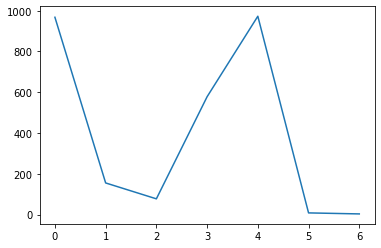

In [60]:
df['Births'].plot();

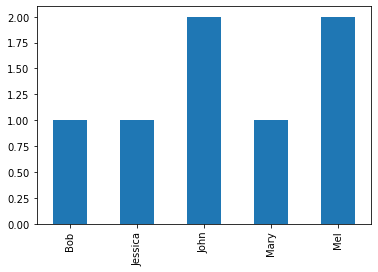

In [61]:
df['Names'].value_counts().sort_index().plot(kind='bar');

In [62]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973
5,John,8
6,Mel,3


<AxesSubplot:xlabel='Births', ylabel='Names'>

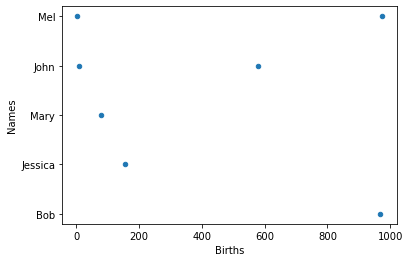

In [63]:
c = df.copy()
c.plot(x='Births', y='Names', kind='scatter')

### Time to - Exercises-2
Go to: pycon-pandas-tutorial-master\Exercises-2

### Describe the data

In [64]:
df['Names'].unique()

array(['Bob', 'Jessica', 'Mary', 'John', 'Mel'], dtype=object)

In [65]:
print( df['Names'].describe())

count        7
unique       5
top       John
freq         2
Name: Names, dtype: object


### Change column name

In [66]:
df_1 = df.rename(columns = {'Names': 'names'}, inplace = False)
df_1

,names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973
5,John,8
6,Mel,3


### Add a column

In [71]:
d = [0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9]
# Create dataframe
df = pd.DataFrame(d)  # Name the column
df.columns = ['Rev']  # Add another one and set the value in that column
df['New_Col'] = 5
df

,Rev,New_Col
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


### Delete column and row

In [72]:
del df['New_Col']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


where 1 is the axis number (0 for rows and 1 for columns.)

In [75]:
df['New_Col'] = 5
df = df.drop('New_Col', 1)
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [76]:
df = df.drop(3, 0)
df

,Rev
0,0
1,1
2,2
4,4
5,5
6,6
7,7
8,8
9,9


### Aggregation and Grouping

In [325]:
http://localhost:8888/notebooks/3-PANDAS.ipynb#import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Simple Aggregation in Pandas 

In [326]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [327]:
df.groupby('key') # return DataFrameGroupBy

To produce a result, we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result:

In [328]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### Aggregate, filter, transform, apply


In [329]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation
Allow take a string, a function, or a list thereof, and compute all the aggregates at once.

In [330]:
df.groupby('key').aggregate('min')

,data1,data2
key,,
A,0,3
B,1,0
C,2,3


In [331]:
df.groupby('key').aggregate(np.median)

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [332]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [333]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filtering


In [334]:
df['data2'].std()

3.2093613071762426

In [335]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

### Transformation
While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.

In [336]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### The apply() method
Apply an arbitrary function to the group results.

In [337]:
def func_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= (x['data2'] + 2)
    return x

display('df', "df.groupby('key').apply(func_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.500000,0
2,C,0.400000,3


### Grouping the data

In [339]:
df = pd.DataFrame({'A' : ['foo','bar','foo','bar','foo','bar','foo','foo'],
'B':['one','one','two','three','two','two','one','three'],
'C':np.random.randn(8),
'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.023191,0.089241
1,bar,one,0.151904,-0.978759
2,foo,two,0.246905,0.105982
3,bar,three,1.146439,0.278584
4,foo,two,-0.544230,0.175799
5,bar,two,1.462197,-0.975013
6,foo,one,-1.383302,-0.886432
7,foo,three,-0.659871,-2.893687


In [346]:
grouped = df.groupby('A')
print(grouped.sum().head())

            C         D
A                      
bar  2.760541 -1.675189
foo -3.363688 -3.409097


In [347]:
# # Sorts by default , disable this for potential speedup
grouped = df.groupby('A',sort=False)
print(grouped.sum().head())

            C         D
A                      
foo -3.363688 -3.409097
bar  2.760541 -1.675189


In [348]:
grouped.describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
foo   5.0 -0.672738  0.610357 -1.383302 -1.023191 -0.659871 -0.544230   
bar   3.0  0.920180  0.683821  0.151904  0.649172  1.146439  1.304318   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
foo  0.246905   5.0 -0.681819  1.311955 -2.893687 -0.886432  0.089241   
bar  1.462197   3.0 -0.558396  0.724848 -0.978759 -0.976886 -0.975013   

                         
          75%       max  
A                        
foo  0.105982  0.175799  
bar -0.348215  0.278584

In [349]:
grouped = df.groupby([ 'A', 'B'])
print(grouped.sum().head())

                  C         D
A   B                        
bar one    0.151904 -0.978759
    three  1.146439  0.278584
    two    1.462197 -0.975013
foo one   -2.406493 -0.797191
    three -0.659871 -2.893687


In [350]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [351]:
grouped.count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [352]:
grouped.first()

C         D
A   B                        
bar one    0.151904 -0.978759
    three  1.146439  0.278584
    two    1.462197 -0.975013
foo one   -1.023191  0.089241
    three -0.659871 -2.893687
    two    0.246905  0.105982

In [235]:
# Similar results can be obtained with g.last()
grouped.sum()

C         D
A   B                        
bar one   -1.388120  0.943197
    three  1.090383 -1.233581
    two   -0.794890  2.081135
foo one    0.838198 -1.520751
    three  0.667987  1.185583
    two   -1.071903  0.400868

In [236]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -1.388120  0.943197
    three  1.090383 -1.233581
    two   -0.794890  2.081135
foo one    0.838198 -1.520751
    three  0.667987  1.185583
    two   -1.071903  0.400868

In [237]:
grouped['C'].agg([np.sum,np.mean])

sum      mean
A   B                        
bar one   -1.388120 -1.388120
    three  1.090383  1.090383
    two   -0.794890 -0.794890
foo one    0.838198  0.419099
    three  0.667987  0.667987
    two   -1.071903 -0.535951

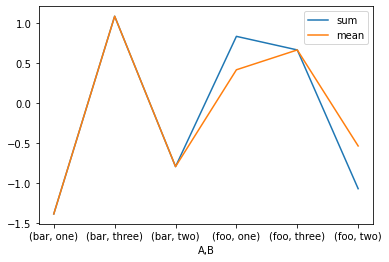

In [238]:
w = grouped ['C'].agg([ np.sum , np.mean ]).plot()
import matplotlib.pyplot as plt
plt.show()

### unstack & stack

In [241]:
grouped = df.groupby([ 'A', 'B']).size()
grouped

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [244]:
grouped_unstack = grouped.unstack()
grouped_unstack

B,one,three,two
A,,,
bar,1,1,1
foo,2,1,2


In [245]:
grouped_unstack.stack()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [246]:
df

,A,B,C,D
0,foo,one,-0.970168,0.171312
1,bar,one,-1.388120,0.943197
2,foo,two,-0.558098,-0.678474
3,bar,three,1.090383,-1.233581
4,foo,two,-0.513805,1.079342
5,bar,two,-0.794890,2.081135
6,foo,one,1.808366,-1.692064
7,foo,three,0.667987,1.185583


In [249]:
df.stack()

0  A         foo
   B         one
   C   -0.970168
   D    0.171312
1  A         bar
   B         one
   C    -1.38812
   D    0.943197
2  A         foo
   B         two
   C   -0.558098
   D   -0.678474
3  A         bar
   B       three
   C     1.09038
   D    -1.23358
4  A         foo
   B         two
   C   -0.513805
   D     1.07934
5  A         bar
   B         two
   C    -0.79489
   D     2.08113
6  A         foo
   B         one
   C     1.80837
   D    -1.69206
7  A         foo
   B       three
   C    0.667987
   D     1.18558
dtype: object

### Time to - Exercises-3 & Exercises-4
Go to: pycon-pandas-tutorial-master\Exercises-3 & Exercises-4

**Choose 3-4 exercises in each page**

### Accessing and indexing the data
Index as immutable array

In [353]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [354]:
ind[1]

3

In [355]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [356]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [358]:
# ind[1] = 0


# ---------------------------------------------------------------------------
# TypeError: Index does not support mutable operations      

TypeError: Index does not support mutable operations

Index as ordered set

In [157]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [158]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [159]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [160]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

Accessing and indexing the data

In [161]:
df['New_Col']

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: New_Col, dtype: int64

In [162]:
df['New_Col'][1] = 2
df

,Rev,New_Col
0,0,5
1,1,2
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [163]:
2 in df['New_Col']


True

In [164]:
list(df.items())

[('Rev',
  0    0
  1    1
  2    2
  3    3
  4    4
  5    5
  6    6
  7    7
  8    8
  9    9
  Name: Rev, dtype: int64),
 ('New_Col',
  0    5
  1    2
  2    5
  3    5
  4    5
  5    5
  6    5
  7    5
  8    5
  9    5
  Name: New_Col, dtype: int64)]

In [165]:
df['New_Col'] = df['New_Col'] + 1  
df

,Rev,New_Col
0,0,6
1,1,3
2,2,6
3,3,6
4,4,6
5,5,6
6,6,6
7,7,6
8,8,6
9,9,6


In [166]:
df['New_Col1'] = df['New_Col'] + 1 
df

,Rev,New_Col,New_Col1
0,0,6,7
1,1,3,4
2,2,6,7
3,3,6,7
4,4,6,7
5,5,6,7
6,6,6,7
7,7,6,7
8,8,6,7
9,9,6,7


In [167]:
del df['New_Col']  

df

,Rev,New_Col1
0,0,7
1,1,4
2,2,7
3,3,7
4,4,7
5,5,7
6,6,7
7,7,7
8,8,7
9,9,7


In [168]:
# Edit the index name
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df

,Rev,New_Col1
a,0,7
b,1,4
c,2,7
d,3,7
e,4,7
f,5,7
g,6,7
h,7,7
i,8,7
j,9,7


### loc & iloc

In [169]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [170]:
# explicit index when indexing
data[1]

'a'

In [171]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [172]:
data.loc[1]

'a'

In [173]:
data.loc[1:3]

1    a
3    b
dtype: object

In [174]:
df

,Rev,New_Col1
a,0,7
b,1,4
c,2,7
d,3,7
e,4,7
f,5,7
g,6,7
h,7,7
i,8,7
j,9,7


In [175]:
# Find based on index value
df.loc['a']


Rev         0
New_Col1    7
Name: a, dtype: int64

In [176]:
df.loc['a':'d']

,Rev,New_Col1
a,0,7
b,1,4
c,2,7
d,3,7


In [177]:
df.loc[['a','d']]

,Rev,New_Col1
a,0,7
d,3,7


The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [178]:
data.iloc[1]

'b'

In [179]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [180]:
# Do integer position based indexing
df.iloc[0:3]

,Rev,New_Col1
a,0,7
b,1,4
c,2,7


In [181]:
# Access using the column name
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [182]:
# Access multiple columns
df['test'] = df['Rev'] + 1  
df['test2'] = df['Rev'] + 2 
df

,Rev,New_Col1,test,test2
a,0,7,1,2
b,1,4,2,3
c,2,7,3,4
d,3,7,4,5
e,4,7,5,6
f,5,7,6,7
g,6,7,7,8
h,7,7,8,9
i,8,7,9,10
j,9,7,10,11


In [183]:
df[['Rev', 'test']]  # Subset the data

,Rev,test
a,0,1
b,1,2
c,2,3
d,3,4
e,4,5
f,5,6
g,6,7
h,7,8
i,8,9
j,9,10


DataFrame as two-dimensional array


In [184]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [185]:
data.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]], dtype=int64)

In [186]:
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135


In [187]:
data.values[0]

array([  423967, 38332521], dtype=int64)

In [188]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [189]:
data.iloc[:3, :1]

,area
California,423967
Texas,695662
New York,141297


In [190]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [191]:
data.loc[data.area > 170312, ['pop', 'area']]

,pop,area
California,38332521,423967
Texas,26448193,695662


In [192]:
data.iloc[0, 1] = 90
data

,area,pop
California,423967,90
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


### at & iat

In [193]:
df

,Rev,New_Col1,test,test2
a,0,7,1,2
b,1,4,2,3
c,2,7,3,4
d,3,7,4,5
e,4,7,5,6
f,5,7,6,7
g,6,7,7,8
h,7,7,8,9
i,8,7,9,10
j,9,7,10,11


In [194]:
# Find based on index value
df.at['b','Rev']  

1

In [195]:
df.iat[1 ,0]

1

### Index alignment in Series


In [85]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [86]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [87]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [88]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [89]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Merge and Join

In [206]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [211]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [212]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.

### Many-to-one joins

In [213]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-many joins
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.

In [214]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


### The ``on`` keyword


In [215]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [216]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [217]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The ``left_index`` and ``right_index`` keywords


In [218]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [221]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


### Index alignment in DataFrame


In [198]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,6,19
1,14,10


In [92]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,7,4,6
1,9,2,6
2,7,4,3


In [93]:
A + B

,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


In [204]:
A.stack().mean()

12.25

In [94]:
fill = A.stack().mean() # Calc the mean of all A matrx and add it to B values
A.add(B, fill_value=fill)

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25



| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


### Missing data

In [102]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [103]:
1 + np.nan

nan

In [104]:
0 *  np.nan

nan

In [105]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [106]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [126]:
import numpy as np
df = pd.DataFrame(np.random.randint(20, size=(5, 3)), 
                  index =['a','c','e','f','h'],
                  columns =['one','two','three']) 
df.loc['c','two'] = np.nan
df.loc['e','two'] = None

df

,one,two,three
a,12,2.0,1
c,10,NaN,13
e,9,NaN,9
f,15,8.0,9
h,7,7.0,19


## Operating on Null Values

In [127]:
df.isnull()

,one,two,three
a,False,False,False
c,False,True,False
e,False,True,False
f,False,False,False
h,False,False,False


In [128]:
df[df.notnull()]

,one,two,three
a,12,2.0,1
c,10,NaN,13
e,9,NaN,9
f,15,8.0,9
h,7,7.0,19


In [129]:
df.dropna()

,one,two,three
a,12,2.0,1
f,15,8.0,9
h,7,7.0,19


In [130]:
df.fillna(0)

,one,two,three
a,12,2.0,1
c,10,0.0,13
e,9,0.0,9
f,15,8.0,9
h,7,7.0,19


In [131]:
# forward-fill
df.fillna(method='ffill')

,one,two,three
a,12,2.0,1
c,10,2.0,13
e,9,2.0,9
f,15,8.0,9
h,7,7.0,19


In [133]:
# back-fill
df.fillna(method='bfill')

,one,two,three
a,12,2.0,1
c,10,8.0,13
e,9,8.0,9
f,15,8.0,9
h,7,7.0,19


In [134]:
df.fillna(method='ffill', axis=1)

,one,two,three
a,12.0,2.0,1.0
c,10.0,10.0,13.0
e,9.0,9.0,9.0
f,15.0,8.0,9.0
h,7.0,7.0,19.0


### Query the data

In [33]:
df.query('one > 0')

,one,two,three
a,0.470905,NaN,0.787003
c,0.163296,0.588781,1.087137
h,1.248824,-1.229094,1.116233


In [34]:
df.query('one > 0 & two > 0')

,one,two,three
c,0.163296,0.588781,1.087137


### Apply a function

In [35]:
df.apply( lambda x: x.max() - x.min())

one      1.908999
two      2.139010
three    1.626133
dtype: float64

### Applymap a function	

In [36]:
df.applymap(np.sqrt )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7603: RuntimeWarning: invalid value encountered in sqrt
  return lib.map_infer(x.astype(object)._values, func)


,one,two,three
a,0.686225,NaN,0.887132
c,0.404099,0.767321,1.042659
e,NaN,NaN,NaN
f,NaN,0.953895,NaN
h,1.117508,NaN,1.056519


### Query data

In [37]:
s = pd.Series(np.arange(5) , index =np.arange(5) [:: -1] , dtype ='int64')
s.isin([2 ,4 ,6])


4    False
3    False
2     True
1    False
0     True
dtype: bool

### transform

In [51]:
f = lambda x: x*2
transformed = grouped.transform(f)
print(transformed)

            B         C         D
0      oneone -2.429077 -1.714246
1      oneone -3.049081 -2.325633
2      twotwo -4.282337  1.180283
3  threethree  2.425860 -1.440507
4      twotwo -2.140264 -0.777225
5      twotwo -0.774837 -1.156843
6      oneone -2.390516 -0.223827
7  threethree -1.709516 -3.553557


In [52]:
grouped.filter( lambda x: sum(x['C']) >0)

,B,C,D


# More Examples:

## The College Experience Using College Scorecard
https://zionjoseph.github.io/320-project-5/ - You can find this notebook in our Pandas folder. Link to the data: 
1. https://catalog.data.gov/dataset/college-scorecard/resource/77d2e376-c5bb-46d7-a985-e214e009e36e
2. https://collegescorecard.ed.gov/data/

## Baltimore Crime
https://zionjoseph.github.io/320-project-4/

## Corona
https://www.kaggle.com/duttadebadri/covid-19-analysing-growth-sir-modeling-india
